In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv(r'application.csv')

In [3]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,384575,0,Cash loans,M,Y,N,2,207000.0,465457.5,52641.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
1,214010,0,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
2,142232,0,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
3,389171,0,Cash loans,F,N,Y,0,247500.0,254700.0,24939.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,283617,0,Cash loans,M,N,Y,0,112500.0,308133.0,15862.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15371,406895,0,Cash loans,F,Y,Y,1,112500.0,406597.5,31594.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
15372,376623,0,Cash loans,F,N,Y,0,112500.0,254700.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
15373,273086,0,Cash loans,M,N,Y,0,121360.5,1080000.0,29700.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
15374,160442,0,Cash loans,F,Y,Y,0,90000.0,526491.0,32337.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


0

<AxesSubplot:>

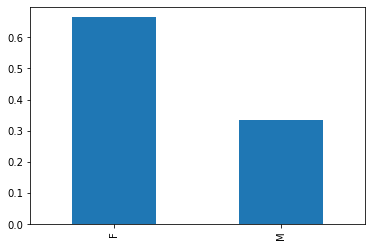

In [4]:
#univariate analysis
df['CODE_GENDER'].isnull().sum()
df['CODE_GENDER'].value_counts(normalize = True).plot.bar()
#in univariate analysis, find there any missing value then fill those missing value , and see if there any outlier the remove that

In [5]:
df['TARGET'].mean()
# that means out of 100 people, 8 people are defaulter(defaulter who does not pay the emi or loan)
df.groupby('CODE_GENDER')['TARGET'].mean()
#that means 6% female are defaulter and 10% male are defaulter

0.08155567117585848

CODE_GENDER
F    0.068598
M    0.107233
Name: TARGET, dtype: float64

In [6]:
#two categorical column analysis code_gender & target
from scipy.stats import chi2_contingency
contingency = pd.crosstab(df['CODE_GENDER'],df['TARGET'])
contingency
chi2_contingency(contingency)
#p_value is  very less, less than 0.05 that means both variable have strong associlation and relation.

TARGET,0,1
CODE_GENDER,,
F,9518,701
M,4604,553


(67.78522275857772,
 1.823107293272869e-16,
 1,
 array([[9385.58259625,  833.41740375],
        [4736.41740375,  420.58259625]]))

In [7]:
#one continous and one categorical analysis income and target
#AMT_INCOME_TOTAL
#TARGET  
df['amount_income_total_decile'] = pd.qcut(df['AMT_INCOME_TOTAL'],10 , labels = False)
df.groupby('amount_income_total_decile').agg(avg_amount_income_total = ('AMT_INCOME_TOTAL','mean'),
                                             default_rate = ('TARGET','mean')).reset_index()
#first default rate is increasing then decreasing
#default rate is very less where income is high
contingency = pd.crosstab(df['amount_income_total_decile'],df['TARGET'])
chi2_contingency(contingency)
#p_value is less than 0.05 that means both variable have strong associlation and relation

,amount_income_total_decile,avg_amount_income_total,default_rate
0,0,66506.113421,0.083626
1,1,91075.858047,0.080678
2,2,111467.583697,0.095420
3,3,131818.477741,0.092333
4,4,144420.979592,0.098639
5,5,157627.881048,0.080645
6,6,178078.974301,0.075472
7,7,213076.110123,0.086639
8,8,259129.961650,0.062136
9,9,465862.904968,0.053276


(31.275579241602074,
 0.0002654692474763926,
 9,
 array([[1570.53980229,  139.46019771],
        [1354.70538502,  120.29461498],
        [1684.42689906,  149.57310094],
        [2228.14594173,  197.85405827],
        [ 270.02263267,   23.97736733],
        [1366.64516129,  121.35483871],
        [1411.6489334 ,  125.3510666 ],
        [2014.14841311,  178.85158689],
        [ 945.99765869,   84.00234131],
        [1275.71917274,  113.28082726]]))

In [27]:
df['AMT_INCOME_TOTAL'].mean()
df.groupby('TARGET')['AMT_INCOME_TOTAL'].mean()

group_1 = df.loc[df['TARGET']==1, 'AMT_INCOME_TOTAL']
group_0 = df.loc[df['TARGET']==0, 'AMT_INCOME_TOTAL']

from scipy.stats import f_oneway
f_oneway(group_0,group_1)

#p_value is less that 0.05, that means groups are not related that means TARGET variable has an impact on AMT_INCOME_TOTAL variable

175875.80018015087

TARGET
0    169169.434752
1    251399.956938
Name: AMT_INCOME_TOTAL, dtype: float64

F_onewayResult(statistic=8.68819608325127, pvalue=0.003207586837755278)

<Figure size 864x432 with 0 Axes>

C:\Users\himanshu mishra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

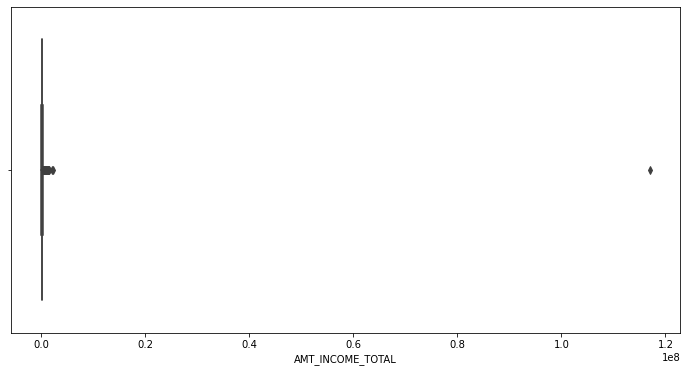

In [8]:
#the analysis seems doubtfully
plt.figure(figsize = (12,6))
sns.boxplot(df['AMT_INCOME_TOTAL'])
q1 = df['AMT_INCOME_TOTAL'].quantile(0.25)
q3 = df['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = q3-q1
lower_range, upper_range = q1-1.5*IQR, q3+1.5*IQR
df['amount_income_total_capped'] = np.where(df['AMT_INCOME_TOTAL']<lower_range,lower_range,np.where(df['AMT_INCOME_TOTAL']>upper_range,upper_range,df['AMT_INCOME_TOTAL']))
#now, no outliers exist in this column which is greater than upper_range and lower than lower_range

<Figure size 864x432 with 0 Axes>

C:\Users\himanshu mishra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount_income_total_capped'>

<Figure size 864x432 with 0 Axes>

(array([  18.,   28.,  138.,   57.,  110.,  131.,  595.,  318.,  320.,
          95., 1188.,  197.,  156., 1669.,  136.,  442.,   70., 1781.,
         205.,   89.,   49., 1438.,  107.,  194., 1210.,   26.,  146.,
          19.,  857.,   46.,   72., 1051.,   24.,   39.,   45.,  286.,
          49.,   21.,   12.,  559.,   18.,   12.,  211.,    6.,   38.,
           5.,  293.,    9.,    4.,  787.]),
 array([ 27000.,  33210.,  39420.,  45630.,  51840.,  58050.,  64260.,
         70470.,  76680.,  82890.,  89100.,  95310., 101520., 107730.,
        113940., 120150., 126360., 132570., 138780., 144990., 151200.,
        157410., 163620., 169830., 176040., 182250., 188460., 194670.,
        200880., 207090., 213300., 219510., 225720., 231930., 238140.,
        244350., 250560., 256770., 262980., 269190., 275400., 281610.,
        287820., 294030., 300240., 306450., 312660., 318870., 325080.,
        331290., 337500.]),
 <BarContainer object of 50 artists>)

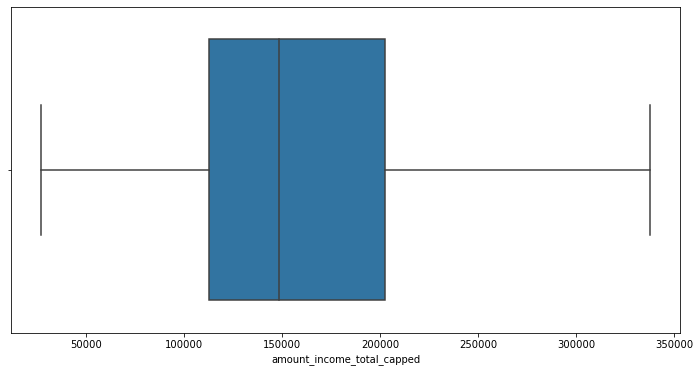

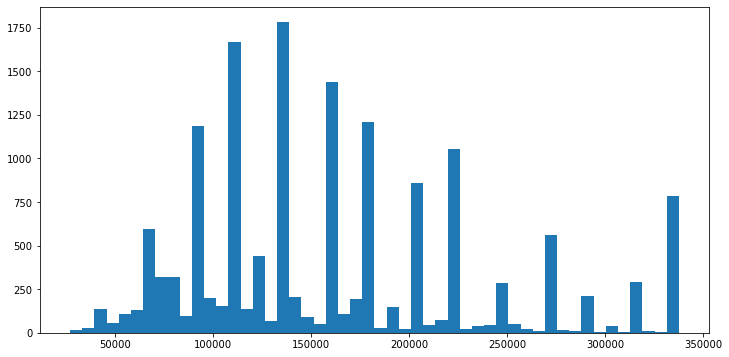

In [9]:
plt.figure(figsize = (12,6))
sns.boxplot(df['amount_income_total_capped'])
#this seems good data fro analysis as there is no outliers
plt.figure(figsize = (12,6))
plt.hist(df['amount_income_total_capped'], bins = 50)

In [12]:
#one continous and one categorical analysis income and target
#AMT_INCOME_TOTAL
#TARGET  
df['amount_income_total_decile'] = pd.qcut(df['amount_income_total_capped'],10 , labels = False)
df.groupby('amount_income_total_decile').agg(avg_amount_income_total = ('amount_income_total_capped','mean'),
                                             default_rate = ('TARGET','mean')).reset_index()
#first default rate is increasing then decreasing
#default rate is very less where income is high
contingency = pd.crosstab(df['amount_income_total_decile'],df['TARGET'])
chi2_contingency(contingency)
#p_value is less than 0.05 that means both variable have strong associlation and relation

,amount_income_total_decile,avg_amount_income_total,default_rate
0,0,66506.113421,0.083626
1,1,91075.858047,0.080678
2,2,111467.583697,0.095420
3,3,131818.477741,0.092333
4,4,144420.979592,0.098639
5,5,157627.881048,0.080645
6,6,178078.974301,0.075472
7,7,213076.110123,0.086639
8,8,259129.961650,0.062136
9,9,323070.084233,0.053276


(31.275579241602074,
 0.0002654692474763926,
 9,
 array([[1570.53980229,  139.46019771],
        [1354.70538502,  120.29461498],
        [1684.42689906,  149.57310094],
        [2228.14594173,  197.85405827],
        [ 270.02263267,   23.97736733],
        [1366.64516129,  121.35483871],
        [1411.6489334 ,  125.3510666 ],
        [2014.14841311,  178.85158689],
        [ 945.99765869,   84.00234131],
        [1275.71917274,  113.28082726]]))

In [14]:
df['amount_income_total_capped'].mean()
df.groupby('TARGET')['amount_income_total_capped'].mean()

group_1 = df.loc[df['TARGET']==1, 'amount_income_total_capped']
group_0 = df.loc[df['TARGET']==0, 'amount_income_total_capped']

from scipy.stats import f_oneway
f_oneway(group_0,group_1)

162976.52676703953

TARGET
0    163689.521992
1    154947.086124
Name: amount_income_total_capped, dtype: float64

F_onewayResult(statistic=16.277358161939205, pvalue=5.4978403762114225e-05)

In [19]:
pd.pivot_table(data=df, index = ['amount_income_total_decile'], columns = ['CODE_GENDER'], values = ['TARGET'], aggfunc = 'mean' )
#In the medium bucket female are defaulting more
pd.pivot_table(data=df, index = ['amount_income_total_decile'], columns = ['CODE_GENDER'], values = ['TARGET'], aggfunc = 'count' )

TARGET          
CODE_GENDER                        F         M
amount_income_total_decile                    
0                           0.074878  0.128114
1                           0.069707  0.121406
2                           0.081752  0.135776
3                           0.071300  0.138705
4                           0.092784  0.110000
5                           0.072508  0.096970
6                           0.053691  0.105754
7                           0.076033  0.099695
8                           0.039792  0.090708
9                           0.040278  0.067265

TARGET     
CODE_GENDER                     F    M
amount_income_total_decile            
0                            1429  281
1                            1162  313
2                            1370  464
3                            1669  757
4                             194  100
5                             993  495
6                             894  643
7                            1210  983
8                             578  452
9                             720  669

In [29]:
#Amount Credit and default
df['amount_credit_deciles'] = pd.qcut(df['AMT_CREDIT'],10,labels = False)
df.groupby('amount_credit_deciles').agg(avg_amt_credit = ('AMT_CREDIT','mean'), default_rate = ('TARGET','mean'))

from scipy.stats import chi2_contingency
contingency = pd.crosstab(df['amount_credit_deciles'],df['TARGET'])
chi2_contingency(contingency)

df['AMT_CREDIT'].mean()
df.groupby('TARGET')['AMT_CREDIT'].mean()

group1 = df.loc[df['TARGET']==1, 'AMT_CREDIT']
group0 = df.loc[df['TARGET']==0, 'AMT_CREDIT']

from scipy.stats import f_oneway
f_oneway(group0,group1)

,avg_amt_credit,default_rate
amount_credit_deciles,,
0,1.379761e+05,0.064655
1,2.282442e+05,0.075853
2,2.779576e+05,0.073101
3,3.601450e+05,0.091909
4,4.713227e+05,0.092277
5,5.522203e+05,0.112119
6,6.737640e+05,0.095176
7,8.232925e+05,0.070807
8,1.030317e+06,0.085735


(52.151740799174874,
 4.231250871613609e-08,
 9,
 array([[1491.55359001,  132.44640999],
        [1452.9789282 ,  129.0210718 ],
        [1294.08805931,  114.91194069],
        [1418.99648803,  126.00351197],
        [1403.38293444,  124.61706556],
        [1417.15959938,  125.84040062],
        [1408.89360042,  125.10639958],
        [1582.47957856,  140.52042144],
        [1242.6551769 ,  110.3448231 ],
        [1409.81204475,  125.18795525]]))

598550.1798582206

TARGET
0    600510.555835
1    576473.282297
Name: AMT_CREDIT, dtype: float64

F_onewayResult(statistic=4.104432664341771, pvalue=0.042788174303002344)

In [20]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,amount_income_total_decile,amount_income_total_capped
0,384575,0,Cash loans,M,Y,N,2,207000.0,465457.5,52641.0,...,0,0,0.0,0.0,0.0,1.0,0.0,1.0,7,207000.0
1,214010,0,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,...,0,0,0.0,0.0,0.0,1.0,0.0,3.0,8,247500.0
2,142232,0,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,...,0,0,0.0,0.0,0.0,1.0,0.0,3.0,7,202500.0
3,389171,0,Cash loans,F,N,Y,0,247500.0,254700.0,24939.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,8,247500.0
4,283617,0,Cash loans,M,N,Y,0,112500.0,308133.0,15862.5,...,0,0,0.0,0.0,0.0,0.0,0.0,4.0,2,112500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15371,406895,0,Cash loans,F,Y,Y,1,112500.0,406597.5,31594.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2,112500.0
15372,376623,0,Cash loans,F,N,Y,0,112500.0,254700.0,20250.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2,112500.0
15373,273086,0,Cash loans,M,N,Y,0,121360.5,1080000.0,29700.0,...,0,0,0.0,0.0,0.0,0.0,0.0,2.0,3,121360.5
15374,160442,0,Cash loans,F,Y,Y,0,90000.0,526491.0,32337.0,...,0,0,0.0,0.0,0.0,0.0,0.0,2.0,1,90000.0


In [11]:
def continous_analysis(df, cont_var, target, decile_count = 10):
    df['deciles_var'] = pd.qcut(df[cont_var], decile_count, labels = False)
    group_wise = df.groupby('deciles_var').agg(avg_amt_credit = (cont_var,'mean'), default_rate = (target,'mean'))

    from scipy.stats import chi2_contingency
    contingency = pd.crosstab(df['deciles_var'],df[target])
    chi = chi2_contingency(contingency)

    mean_analysis1 = df[cont_var].mean()
    mean_analysis2 = df.groupby(target)[cont_var].mean()

    group1 = df.loc[df[target]==1, cont_var]
    group0 = df.loc[df[target]==0, cont_var]
    anova  = f_oneway(group0,group1)
    return group_wise, chi, mean_analysis1, mean_analysis2, anova
    

In [16]:
group_wise, chi, mean_analysis1, mean_analysis2, anova = continous_analysis(df, 'AMT_CREDIT', 'TARGET', 10)
group_wise
chi
mean_analysis1
mean_analysis2
anova

,avg_amt_credit,default_rate
deciles_var,,
0,1.379761e+05,0.064655
1,2.282442e+05,0.075853
2,2.779576e+05,0.073101
3,3.601450e+05,0.091909
4,4.713227e+05,0.092277
5,5.522203e+05,0.112119
6,6.737640e+05,0.095176
7,8.232925e+05,0.070807
8,1.030317e+06,0.085735


(52.151740799174874,
 4.231250871613609e-08,
 9,
 array([[1491.55359001,  132.44640999],
        [1452.9789282 ,  129.0210718 ],
        [1294.08805931,  114.91194069],
        [1418.99648803,  126.00351197],
        [1403.38293444,  124.61706556],
        [1417.15959938,  125.84040062],
        [1408.89360042,  125.10639958],
        [1582.47957856,  140.52042144],
        [1242.6551769 ,  110.3448231 ],
        [1409.81204475,  125.18795525]]))

598550.1798582206

TARGET
0    600510.555835
1    576473.282297
Name: AMT_CREDIT, dtype: float64

F_onewayResult(statistic=4.104432664341771, pvalue=0.042788174303002344)

In [27]:
def outlier_treatment(df, var, side = 'l', treatment_type = 'cap'):
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    IQR = q3 - q1
    lower = q1 - 1.5*IQR
    upper = q3 + 1.5*IQR
    if (side == 'l'):
        if (treatment_type == 'cap'):
            df.loc[df[var] < lower, var] = lower
        else:
            df = df[df[var] >= lower]
    elif(side == 'u' ):
        if (treatment_type == 'cap'):
            df.loc[df[var] > upper, var] = upper
        else:
            df = df[df[var] <= upper]
    else:
        if(treatment_type == 'cap'):
            df.loc[df[var] < lower, var] = lower
            df.loc[df[var] > upper, var] = upper
        else:
            df = df[(df[var] >= lower) & (df[var] <= upper)]
    return df

<Figure size 864x432 with 0 Axes>

(array([4.820e+02, 1.456e+03, 2.321e+03, 1.309e+03, 6.480e+02, 1.731e+03,
        1.290e+03, 1.122e+03, 7.200e+02, 8.520e+02, 6.760e+02, 3.420e+02,
        5.740e+02, 3.860e+02, 2.260e+02, 3.810e+02, 2.050e+02, 1.070e+02,
        1.580e+02, 6.800e+01, 5.900e+01, 9.100e+01, 3.100e+01, 1.400e+01,
        5.100e+01, 1.000e+01, 1.500e+01, 1.700e+01, 6.000e+00, 0.000e+00,
        1.500e+01, 2.000e+00, 0.000e+00, 6.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  45000.,  125100.,  205200.,  285300.,  365400.,  445500.,
         525600.,  605700.,  685800.,  765900.,  846000.,  926100.,
        1006200., 1086300., 1166400., 1246500., 1326600., 1406700.,
        1486800., 1566900., 1647000., 1727100., 1807200., 1887300.,
        1967400., 2047500., 2127600., 2207700., 2287800., 2367900.,
        2448000., 2528100., 2608200.

<Figure size 864x432 with 0 Axes>

C:\Users\himanshu mishra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_CREDIT'>

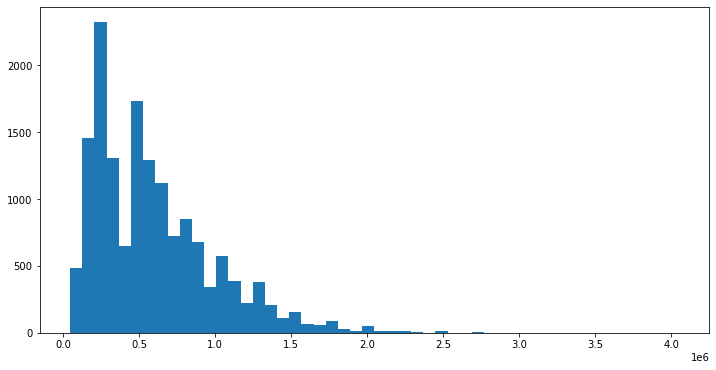

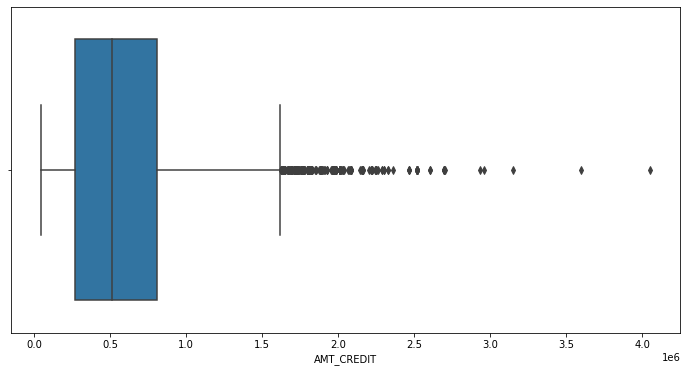

In [19]:
#univariate analysis with outliers
plt.figure(figsize = (12,6))
plt.hist(df['AMT_CREDIT'], bins = 50)
plt.figure(figsize = (12,6))
sns.boxplot(df['AMT_CREDIT'])

In [28]:
#now we wanna go for removing the outliers
dff = outlier_treatment(df, 'AMT_CREDIT', side = 'u', treatment_type = 'cap')

<Figure size 864x432 with 0 Axes>

(array([ 165.,  199.,  401.,  440.,  581.,  765.,  789., 1118.,  557.,
         426.,  326.,  279.,  738.,  343.,  582.,  880.,  321.,  365.,
         342.,  164.,  698.,  213.,  388.,  307.,  397.,  235.,  130.,
         458.,  153.,  126.,  180.,  195.,  259.,   78.,  273.,   63.,
          75.,  123.,  116.,  186.,   97.,  159.,   28.,   23.,   49.,
          39.,   56.,   97.,   52.,  342.]),
 array([  45000. ,   76432.5,  107865. ,  139297.5,  170730. ,  202162.5,
         233595. ,  265027.5,  296460. ,  327892.5,  359325. ,  390757.5,
         422190. ,  453622.5,  485055. ,  516487.5,  547920. ,  579352.5,
         610785. ,  642217.5,  673650. ,  705082.5,  736515. ,  767947.5,
         799380. ,  830812.5,  862245. ,  893677.5,  925110. ,  956542.5,
         987975. , 1019407.5, 1050840. , 1082272.5, 1113705. , 1145137.5,
        1176570. , 1208002.5, 1239435. , 1270867.5, 1302300. , 1333732.5,
        1365165. , 1396597.5, 1428030. , 1459462.5, 1490895. , 1522327.5,
        

<Figure size 864x432 with 0 Axes>

C:\Users\himanshu mishra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_CREDIT'>

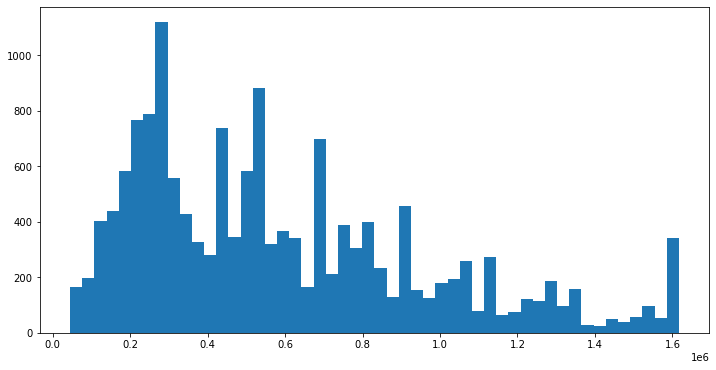

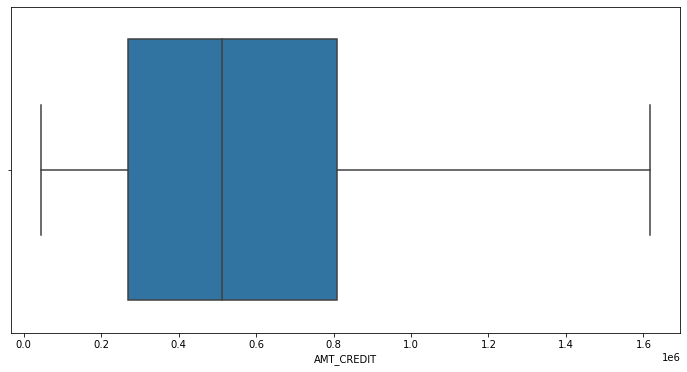

In [29]:
#univariate analysis without outliers
plt.figure(figsize = (12,6))
plt.hist(dff['AMT_CREDIT'], bins = 50)
plt.figure(figsize = (12,6))
sns.boxplot(dff['AMT_CREDIT'])

In [30]:
#now lets do the previous analysis one more time, without outliers
#Amount Credit and default_rate after removing outliers from AMT_CREDIT
#df: with outlier, dff: without outliers

dff['amount_credit_deciles'] = pd.qcut(dff['AMT_CREDIT'],10,labels = False)
dff.groupby('amount_credit_deciles').agg(avg_amt_credit = ('AMT_CREDIT','mean'), default_rate = ('TARGET','mean'))

from scipy.stats import chi2_contingency
contingency = pd.crosstab(dff['amount_credit_deciles'],dff['TARGET'])
chi2_contingency(contingency)

dff['AMT_CREDIT'].mean()
dff.groupby('TARGET')['AMT_CREDIT'].mean()

group1 = df.loc[dff['TARGET']==1, 'AMT_CREDIT']
group0 = df.loc[dff['TARGET']==0, 'AMT_CREDIT']

from scipy.stats import f_oneway
f_oneway(group0,group1)

#if you see , you will findout presence of outlier making it significance, it was the nature of the data
#its depend on the call that you have to remove the outliers or not

,avg_amt_credit,default_rate
amount_credit_deciles,,
0,1.379761e+05,0.064655
1,2.282442e+05,0.075853
2,2.779576e+05,0.073101
3,3.601450e+05,0.091909
4,4.713227e+05,0.092277
5,5.522203e+05,0.112119
6,6.737640e+05,0.095176
7,8.232925e+05,0.070807
8,1.030317e+06,0.085735


(52.151740799174874,
 4.231250871613609e-08,
 9,
 array([[1491.55359001,  132.44640999],
        [1452.9789282 ,  129.0210718 ],
        [1294.08805931,  114.91194069],
        [1418.99648803,  126.00351197],
        [1403.38293444,  124.61706556],
        [1417.15959938,  125.84040062],
        [1408.89360042,  125.10639958],
        [1582.47957856,  140.52042144],
        [1242.6551769 ,  110.3448231 ],
        [1409.81204475,  125.18795525]]))

591453.4103147762

TARGET
0    593154.808101
1    572293.011962
Name: AMT_CREDIT, dtype: float64

F_onewayResult(statistic=3.49729916064754, pvalue=0.06148798727835885)